# Titanic Train Preprocessing Method 

#### Using Encoding Method 
#### Using Feature Scalling Method

### -----****************------------**********------------************-----------**

In [1]:
import os
os.getcwd()

'C:\\Users\\ap983\\Desktop\\Pandey  IMp\\COMPLETE PYTHON PROJECT\\6.TITANIC TRAIN PREPROCE p'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('C:/Users/ap983/Desktop/Pandey  IMp/COMPLETE PYTHON PROJECT/6.TITANIC TRAIN PREPROCE p//titanic_train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# check missing data
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# how much percent
dataset.isnull().sum() / len(dataset)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
# Drop variable - Cabin because we have 77% missing data
dataset = dataset.drop(['Cabin'], axis=1)

In [7]:
dataset.isnull().sum() / len(dataset)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [11]:
dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# Age - conclusion
### almost 20% of the values are missing
### we have to check outlier and on that basis we have to decide imputation method

In [12]:
dataset['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

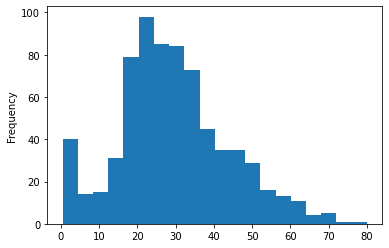

In [13]:
dataset['Age'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Density'>

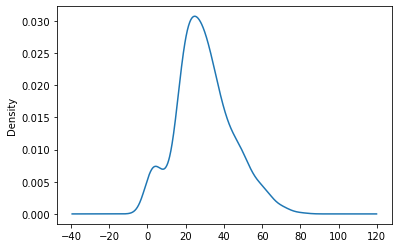

In [14]:
dataset['Age'].plot(kind='kde')

<AxesSubplot:>

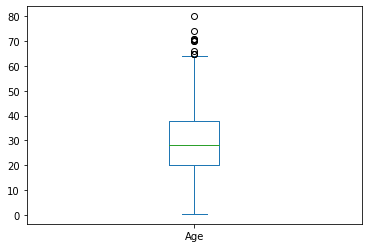

In [15]:
dataset['Age'].plot(kind='box')

In [16]:
dataset[dataset['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


In [17]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [18]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
dataset = dataset.drop(['PassengerId','Name','Ticket','Fare'],axis=1)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [22]:
# Encoding part - Sex and Embarked
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
# label encoder
dataset['Sex'] = dataset['Sex'].astype('category')
dataset['Sex'] = dataset['Sex'].cat.codes

In [24]:
dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
# One Hot Encoding

dataset = pd.get_dummies(dataset, columns = ['Embarked'])

In [26]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,1,3,0,26.0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,0,3,1,35.0,0,0,0,0,1


In [27]:
# dummy variable
dataset = dataset.iloc[:,:-1]

In [28]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
0,0,3,1,22.0,1,0,0,0
1,1,1,0,38.0,1,0,1,0
2,1,3,0,26.0,0,0,0,0
3,1,1,0,35.0,1,0,0,0
4,0,3,1,35.0,0,0,0,0


In [29]:
# Feature Scaling
# Point to remember - we can not do feature scaling with Depenent variable

x = dataset.iloc[:,1:]
y = dataset[['Survived']]

In [30]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
0,3,1,22.0,1,0,0,0
1,1,0,38.0,1,0,1,0
2,3,0,26.0,0,0,0,0
3,1,0,35.0,1,0,0,0
4,3,1,35.0,0,0,0,0


In [31]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Feature scaling with x - independent variable

In [32]:
x1 = x.copy()

In [33]:
x.head(1)

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
0,3,1,22.0,1,0,0,0


In [34]:
x1.head(1)

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
0,3,1,22.0,1,0,0,0


# Standarization

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6
0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.482043,-0.307562
1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,2.074505,-0.307562
2,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.482043,-0.307562
3,-1.566107,-1.355574,0.433312,0.432793,-0.473674,-0.482043,-0.307562
4,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.482043,-0.307562
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.482043,-0.307562
887,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.482043,-0.307562
888,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.482043,-0.307562
889,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,2.074505,-0.307562


# Normalization

In [36]:
from sklearn.preprocessing import Normalizer
nor = Normalizer()
x1 = nor.fit_transform(x1)
pd.DataFrame(x1)

,0,1,2,3,4,5,6
0,0.134840,0.044947,0.988826,0.044947,0.000000,0.000000,0.000000
1,0.026288,0.000000,0.998963,0.026288,0.000000,0.026288,0.000000
2,0.114624,0.000000,0.993409,0.000000,0.000000,0.000000,0.000000
3,0.028548,0.000000,0.999185,0.028548,0.000000,0.000000,0.000000
4,0.085367,0.028456,0.995943,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
886,0.073821,0.036911,0.996588,0.000000,0.000000,0.000000,0.000000
887,0.052559,0.000000,0.998618,0.000000,0.000000,0.000000,0.000000
888,0.106199,0.000000,0.991189,0.035400,0.070799,0.000000,0.000000
889,0.038376,0.038376,0.997788,0.000000,0.000000,0.038376,0.000000


## Thank you 